# DE

In [1]:
import pandas as pd
from utils_m6 import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%time
import json
testing_periods = [int(i*22) for i in range(1, 25)]
training_duration = [int(i*22) for i in (1, 3, 6, 12)]
out = {}
json.dump(out, open('DE_result.json', 'w'))
# out = json.load(open('DE_result.json', 'r'))
for back_p in testing_periods:
    out = json.load(open('DE_result.json', 'r'))
    return_tmp = return_vec.iloc[:-back_p]
    print(f'back_p: {back_p}')
    
    for d in training_duration:
        filename = f'gen_weights_{back_p}_{d}.csv'
        if check_file_exists('./de_weights', filename):
            continue
        out = json.load(open('DE_result.json', 'r'))
        if str(d) not in out.keys():
            out[str(d)] = [[], []]
        tmp = return_tmp.iloc[-d-22:-22]       
        tmp.reset_index(drop=True).to_csv('DE_data.csv', index=False)     
        test_period = return_tmp.iloc[-22:]
        de = DE_portfolio(constraint_eq=[], 
                    constraint_ueq=[# 小于等于0
                                    lambda x: sum([abs(i) for i in x]) - 1,
                                    lambda x: 0.25 - sum([abs(i) for i in x])])
        vals, gen_weights = de.run(n_dim=100, size_pop=100, max_iter=100)
        save_result = pd.DataFrame(gen_weights)
        save_result.to_csv(f'./de_weights/gen_weights_{back_p}_{d}.csv', index=False)
        weights = gen_weights[vals[0]]
        weights = normalize_weights(weights)
        IR, port_daily_rtn = calIR(weights, test_period)
        maxdd = max_drawdown(port_daily_rtn+1)
        out[str(d)][0].append(IR)
        out[str(d)][1].append(maxdd)
            
        json.dump(out, open('DE_result.json', 'w'))
    json.dump(out, open('DE_result.json', 'w'))


In [3]:
def get_best_val(weights, test_df):
    for i in range(weights.shape[0]):

        IR, _ = calIR(weights[i, :], test_df)
        if i == 0:
            best_val = IR
            best_idx = i
        else:
            if IR > best_val:
                best_val = IR
                best_idx = i
    return best_idx

In [54]:
%%time
testing_periods = [int(i*22) for i in range(1, 25)]
training_duration = [int(i*22) for i in (1, 3, 6, 12)]
out = {}
# json.dump(out, open('DE_result.json', 'w'))
# out = json.load(open('DE_result.json', 'r'))

for d in training_duration:
    print(d)
    for back_p in testing_periods:
        return_tmp = return_vec.iloc[:-back_p]
        filename = f'gen_weights_{back_p}_{d}.csv'
        if check_file_exists('./de_weights_100_100', filename):
            
            if d not in out.keys():
                out[d] = [[], []]
 
            test_period = return_tmp.iloc[-22:]

            save_result = pd.read_csv(f'./de_weights_100_100/gen_weights_{back_p}_{d}.csv')
            best_val = get_best_val(save_result.to_numpy(), return_tmp.iloc[-d-22:-22])
            weights = save_result.to_numpy()[best_val, :]
            weights = normalize_weights(weights)
            IR, port_daily_rtn = calIR(weights, test_period)
            maxdd = max_drawdown(port_daily_rtn+1)
            out[d][0].append(IR)
            out[d][1].append(maxdd)
# json.dump(out, open('DE_result.json', 'w'))


22
66
132
264
CPU times: user 6min 17s, sys: 820 ms, total: 6min 18s
Wall time: 6min 19s


In [55]:
print_experiment_results(out)

22
0.791516480858288 2.641568595686711
0.00986584316157929 0.00702742566715836
66
0.2263150285652069 3.454364192648021
0.0085889665822902 0.007203111647737277
132
1.5772177335149713 3.0746959127713223
0.009980790744098841 0.004321570855621135
264
0.4752543772895656 3.161698828673557
0.00919886287409423 0.005241375904738877


## size pop

In [56]:
%%time
testing_periods = [int(i*22) for i in range(1, 13)]

out = {22: [[], []]}

d = 22
for size_pop in [1, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]:
    print(size_pop)
    for back_p in testing_periods:
        return_tmp = return_vec.iloc[:-back_p]
        tmp = return_tmp.iloc[-d-22:-22]       
        tmp.reset_index(drop=True).to_csv('DE_data.csv', index=False)     

        de = DE_portfolio(constraint_eq=[], 
                constraint_ueq=[# 小于等于0
                                lambda x: sum([abs(i) for i in x]) - 1,
                                    lambda x: 0.25 - sum([abs(i) for i in x])])
        vals, gen_weights = de.run(n_dim=100, size_pop=int(size_pop), max_iter=10)
        # vals, gen_weights = de.run(n_dim=100, size_pop=2000, max_iter=300)
        save_result = pd.DataFrame(gen_weights)
        save_result.to_csv(f'./de_weights_sizepop/gen_weights_{back_p}_{size_pop}.csv', index=False)

1
3
5
10
20
50
100
200
500
1000
2000
CPU times: user 3h 41min 34s, sys: 20.8 s, total: 3h 41min 55s
Wall time: 3h 41min 56s


## max iter

In [57]:
%%time
testing_periods = [int(i*22) for i in range(1, 13)]

out = {22: [[], []]}

d = 22
for maxiter in [1, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]:
    print(size_pop)
    for back_p in testing_periods:
        return_tmp = return_vec.iloc[:-back_p]
        tmp = return_tmp.iloc[-d-22:-22]       
        tmp.reset_index(drop=True).to_csv('DE_data.csv', index=False)     
        de = DE_portfolio(constraint_eq=[], 
                constraint_ueq=[# 小于等于0
                                lambda x: sum([abs(i) for i in x]) - 1,
                                    lambda x: 0.25 - sum([abs(i) for i in x])])
        vals, gen_weights = de.run(n_dim=100, size_pop=50, max_iter=int(maxiter))
        # vals, gen_weights = de.run(n_dim=100, size_pop=2000, max_iter=300)
        save_result = pd.DataFrame(gen_weights)
        save_result.to_csv(f'./de_weights_maxiter/gen_weights_{back_p}_{maxiter}.csv', index=False)

2000


2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
CPU times: user 18h 24min 32s, sys: 1min 46s, total: 18h 26min 19s
Wall time: 18h 26min 25s


In [58]:
%%time
testing_periods = [int(i*22) for i in range(1, 25)]
IRs = {}
maxdds = {}


d = 22
for size_pop in [1, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]:
    for back_p in testing_periods:
        if size_pop not in IRs.keys():
            IRs[size_pop] = []
            maxdds[size_pop] = []
        return_tmp = return_vec.iloc[:-back_p]
        filename = f'gen_weights_{back_p}_{size_pop}.csv'
        if check_file_exists('./de_weights_sizepop', filename):
            test_period = return_tmp.iloc[-22:]

            save_result = pd.read_csv(f'./de_weights_sizepop/{filename}')
            best_val = get_best_val(save_result.to_numpy(), return_tmp.iloc[-d-22:-22])
            weights = save_result.to_numpy()[best_val, :]
            weights = normalize_weights(weights)
            IR, port_daily_rtn = calIR(weights, test_period)
            maxdd = max_drawdown(port_daily_rtn+1)
            IRs[size_pop].append(IR)
            maxdds[size_pop].append(maxdd)

CPU times: user 20.7 s, sys: 1.31 s, total: 22 s
Wall time: 23.6 s


In [59]:
IR_sizepop_mean = []
IR_sizepop_std = []
for size_pop, values in IRs.items():
    IR_sizepop_mean.append(np.nanmean(values))
    IR_sizepop_std.append(np.nanstd(values))    
maxdd_sizepop_mean = []
maxdd_sizepop_std = []    
for size_pop, values in maxdds.items():
    maxdd_sizepop_mean.append(np.nanmean(values))
    maxdd_sizepop_std.append(np.nanstd(values))
size_pop = [1, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

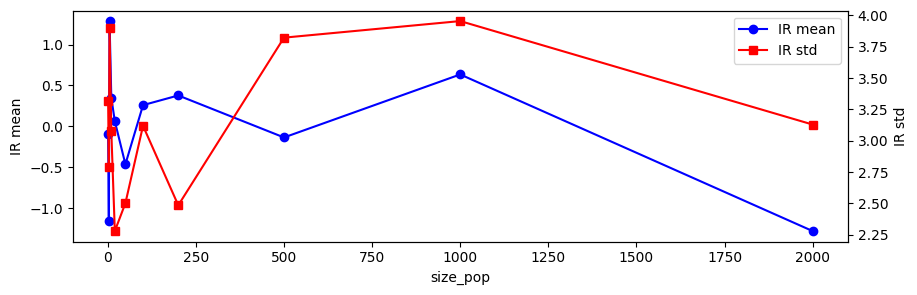

In [70]:
fig, ax1 = plt.subplots(figsize=(10, 3))

ax1.plot(size_pop, IR_sizepop_mean, 'b-', marker='o', label='IR mean')
ax1.set_xlabel('size_pop')
ax1.set_ylabel('IR mean')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(size_pop, IR_sizepop_std, 'r-', marker='s', label='IR std')
ax2.set_ylabel('IR std')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

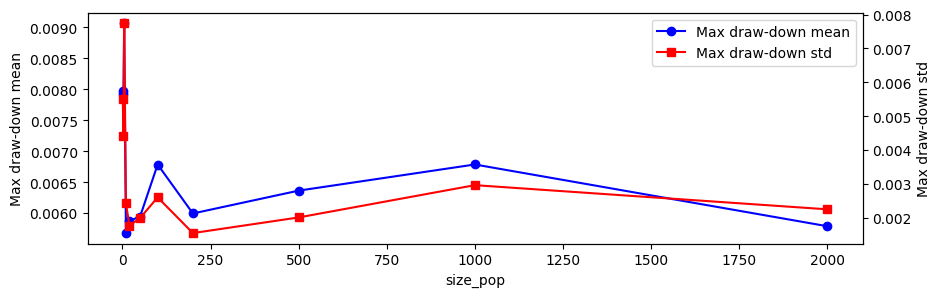

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 3))

ax1.plot(size_pop, maxdd_sizepop_mean, 'b-', marker='o', label='Max draw-down mean')
ax1.set_xlabel('size_pop')
ax1.set_ylabel('Max draw-down mean')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(size_pop, maxdd_sizepop_std, 'r-', marker='s', label='Max draw-down std')
ax2.set_ylabel('Max draw-down std')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

In [63]:
%%time
testing_periods = [int(i*22) for i in range(1, 25)]
IRs = {}
maxdds = {}
d = 22
for maxiter in [1, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]:
    for back_p in testing_periods:
        if maxiter not in IRs.keys():
            IRs[maxiter] = []
            maxdds[maxiter] = []
        return_tmp = return_vec.iloc[:-back_p]
        filename = f'gen_weights_{back_p}_{maxiter}.csv'
        if check_file_exists('./de_weights_maxiter', filename):
            test_period = return_tmp.iloc[-22:]

            save_result = pd.read_csv(f'./de_weights_maxiter/{filename}')
            # best_val = get_best_val(save_result.to_numpy(), return_tmp.iloc[-d-22:-22])
            # weights = save_result.to_numpy()[best_val, :]
            weights = save_result.to_numpy()[-1, :]
            weights = normalize_weights(weights)
            IR, port_daily_rtn = calIR(weights, test_period)
            maxdd = max_drawdown(port_daily_rtn+1)
            IRs[maxiter].append(IR)
            maxdds[maxiter].append(maxdd)


CPU times: user 3 s, sys: 1.43 s, total: 4.43 s
Wall time: 5.67 s


In [64]:
IR_maxiter_mean = []
IR_maxiter_std = []
for maxiter, values in IRs.items():
    IR_maxiter_mean.append(np.nanmean(values))
    IR_maxiter_std.append(np.nanstd(values))    
maxdd_maxiter_mean = []
maxdd_maxiter_std = []    
for maxiter, values in maxdds.items():
    maxdd_maxiter_mean.append(np.nanmean(values))
    maxdd_maxiter_std.append(np.nanstd(values))
maxiter = [1, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]

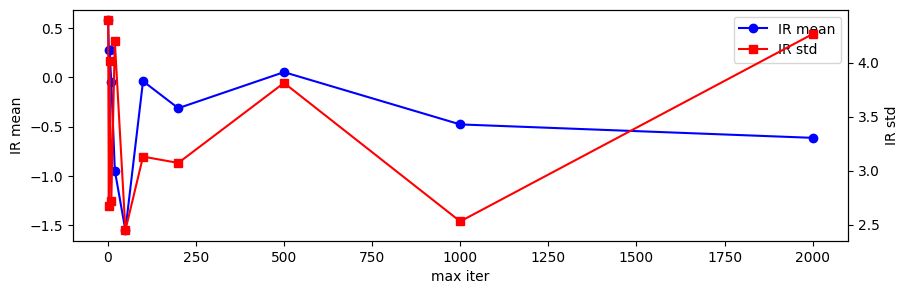

In [72]:
fig, ax1 = plt.subplots(figsize=(10, 3))

ax1.plot(maxiter, IR_maxiter_mean, 'b-', marker='o', label='IR mean')
ax1.set_xlabel('max iter')
ax1.set_ylabel('IR mean')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(maxiter, IR_maxiter_std, 'r-', marker='s', label='IR std')
ax2.set_ylabel('IR std')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

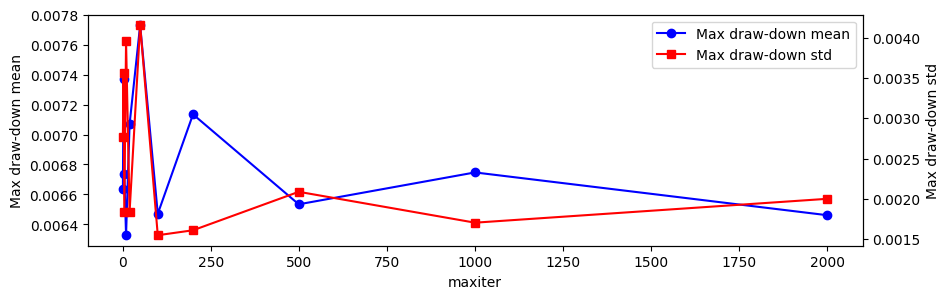

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 3))

ax1.plot(maxiter, maxdd_maxiter_mean, 'b-', marker='o', label='Max draw-down mean')
ax1.set_xlabel('maxiter')
ax1.set_ylabel('Max draw-down mean')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(maxiter, maxdd_maxiter_std, 'r-', marker='s', label='Max draw-down std')
ax2.set_ylabel('Max draw-down std')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()